<a href="https://colab.research.google.com/github/Sathyakumarnsk/detecto/blob/master/detecto_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/My Drive/Detecto/Demo/my_dataset_detecto_big'

os.chdir(WORKING_DIRECTORY)

In [2]:
!ls

images	train_labels  val_labels


In [3]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

In [8]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
    transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
])

#train_dataset = core.Dataset('train.csv', 'images/', transform=transform_img)
#val_dataset = core.Dataset('val_csv','images/',transform=transform_img)

#or
train_dataset = core.Dataset('train_labels/', 'images/',transform=transform_img)
val_dataset = core.Dataset('val_labels/', 'images/',transform=transform_img)



In [9]:
#view the length of train and validation dataset
print(len(train_dataset))
len(val_dataset)

401


34

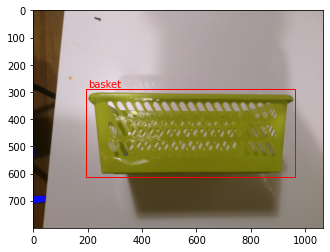

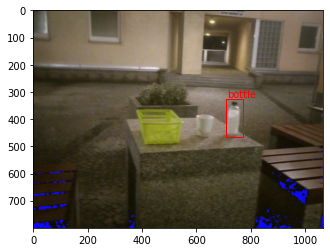

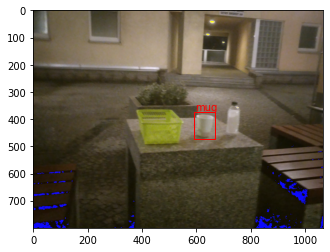

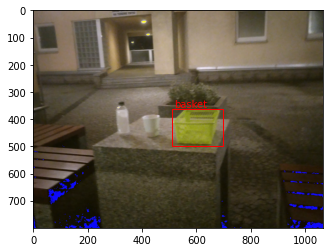

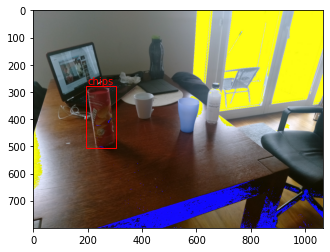

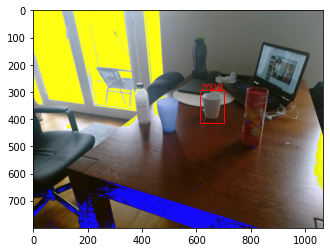

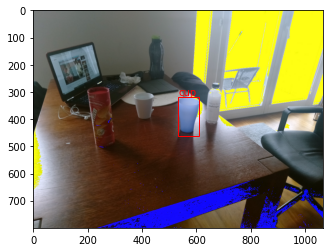

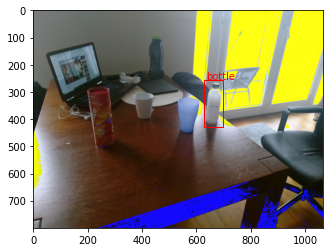

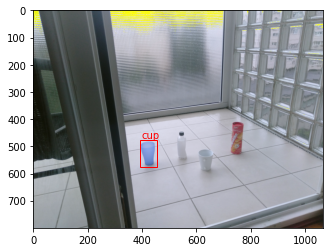

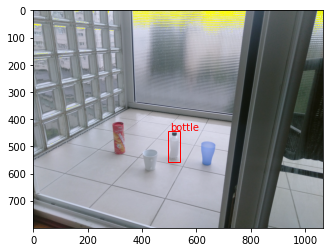

In [10]:
images=[]
for i in range(10):
   image, target = val_dataset[i]
   images.append(image)
   #print(image, target)
   visualize.show_labeled_image(image, target['boxes'], target['labels'])
   

In [ ]:
train_loader = core.DataLoader(train_dataset, batch_size=2, shuffle=True)
model = core.Model(['basket', 'cup', 'mug','bottle','chips'])

losses=model.fit(train_loader,val_dataset, epochs=20, learning_rate=0.001, 
                   lr_step_size=5, verbose=True)

Epoch 1 of 20


/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


Loss: 0.1811816262848237
Epoch 2 of 20
Loss: 0.16080624128089233
Epoch 3 of 20


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
images = []
# Create a list of images 0, 5, 10, ... 40 from val_dataset
for i in range(0, 45, 5):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(3, 3), figsize=(16, 12))

In [ ]:
import glob as glob 
images=glob.glob('test_images/*.jpg')
for i in range:
    image = utils.read_image(images[i])
    images.append(image)
    
visualize.plot_prediction_grid(model, images, dim=(3, 3), figsize=(16, 12))